In [1]:
!java -version

java version "1.8.0_311"
Java(TM) SE Runtime Environment (build 1.8.0_311-b11)
Java HotSpot(TM) Client VM (build 25.311-b11, mixed mode, sharing)


In [2]:
# !pip install pyspark

In [3]:
# !pip install findspark

In [4]:
# !pip install --upgrade pip

In [5]:
import findspark
findspark.init()
findspark.find()

'C:\\spark\\spark-3.2.0-bin-hadoop2.7'

In [6]:
import findspark
findspark.init()

In [7]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [8]:
spark

In [9]:
# !curl -s http://localhost:4040/api/tunnels

In [10]:
sc = spark.sparkContext

In [11]:
df_mob = spark.read.option("header",True) \
     .csv("Global_Mobility_Report.csv")


In [12]:
df_mob.printSchema()


root
 |-- country_region_code: string (nullable = true)
 |-- country_region: string (nullable = true)
 |-- sub_region_1: string (nullable = true)
 |-- sub_region_2: string (nullable = true)
 |-- metro_area: string (nullable = true)
 |-- iso_3166_2_code: string (nullable = true)
 |-- census_fips_code: string (nullable = true)
 |-- place_id: string (nullable = true)
 |-- date: string (nullable = true)
 |-- retail_and_recreation_percent_change_from_baseline: string (nullable = true)
 |-- grocery_and_pharmacy_percent_change_from_baseline: string (nullable = true)
 |-- parks_percent_change_from_baseline: string (nullable = true)
 |-- transit_stations_percent_change_from_baseline: string (nullable = true)
 |-- workplaces_percent_change_from_baseline: string (nullable = true)
 |-- residential_percent_change_from_baseline: string (nullable = true)



In [13]:
df_mob.head(5)

[Row(country_region_code='AE', country_region='United Arab Emirates', sub_region_1=None, sub_region_2=None, metro_area=None, iso_3166_2_code=None, census_fips_code=None, place_id='ChIJvRKrsd9IXj4RpwoIwFYv0zM', date='2020-02-15', retail_and_recreation_percent_change_from_baseline='0', grocery_and_pharmacy_percent_change_from_baseline='4', parks_percent_change_from_baseline='5', transit_stations_percent_change_from_baseline='0', workplaces_percent_change_from_baseline='2', residential_percent_change_from_baseline='1'),
 Row(country_region_code='AE', country_region='United Arab Emirates', sub_region_1=None, sub_region_2=None, metro_area=None, iso_3166_2_code=None, census_fips_code=None, place_id='ChIJvRKrsd9IXj4RpwoIwFYv0zM', date='2020-02-16', retail_and_recreation_percent_change_from_baseline='1', grocery_and_pharmacy_percent_change_from_baseline='4', parks_percent_change_from_baseline='4', transit_stations_percent_change_from_baseline='1', workplaces_percent_change_from_baseline='2', r

In [14]:
df_case = spark.read.option("header",True) \
     .csv("covid_cases.csv")


In [15]:
df_case.head()

Row(iso_code='AFG', continent='Asia', location='Afghanistan', date='2020-02-24', total_cases='1.0', new_cases='1.0', new_cases_smoothed=None, total_deaths=None, new_deaths=None, new_deaths_smoothed=None, total_cases_per_million='0.026', new_cases_per_million='0.026', new_cases_smoothed_per_million=None, total_deaths_per_million=None, new_deaths_per_million=None, new_deaths_smoothed_per_million=None, reproduction_rate=None, icu_patients=None, icu_patients_per_million=None, hosp_patients=None, hosp_patients_per_million=None, weekly_icu_admissions=None, weekly_icu_admissions_per_million=None, weekly_hosp_admissions=None, weekly_hosp_admissions_per_million=None, total_tests=None, new_tests=None, total_tests_per_thousand=None, new_tests_per_thousand=None, new_tests_smoothed=None, new_tests_smoothed_per_thousand=None, positive_rate=None, tests_per_case=None, tests_units=None, total_vaccinations=None, people_vaccinated=None, people_fully_vaccinated=None, new_vaccinations=None, new_vaccination

In [16]:
df_mob.head()

Row(country_region_code='AE', country_region='United Arab Emirates', sub_region_1=None, sub_region_2=None, metro_area=None, iso_3166_2_code=None, census_fips_code=None, place_id='ChIJvRKrsd9IXj4RpwoIwFYv0zM', date='2020-02-15', retail_and_recreation_percent_change_from_baseline='0', grocery_and_pharmacy_percent_change_from_baseline='4', parks_percent_change_from_baseline='5', transit_stations_percent_change_from_baseline='0', workplaces_percent_change_from_baseline='2', residential_percent_change_from_baseline='1')

In [17]:
mobility =df_mob.select('date','country_region','transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline')
cases=df_case.select('date','location', 'new_cases' )


In [18]:
mobility_aus= mobility.filter(mobility.country_region=='Australia')
mobility_uk= mobility.filter(mobility.country_region=='United Kingdom')

In [19]:
cases_aus= cases.filter(cases.location=='Australia')
cases_uk= cases.filter(cases.location=='United Kingdom')

In [20]:
mobility_aus.head(5)

[Row(date='2020-02-15', country_region='Australia', transit_stations_percent_change_from_baseline='3', workplaces_percent_change_from_baseline='3', residential_percent_change_from_baseline='0'),
 Row(date='2020-02-16', country_region='Australia', transit_stations_percent_change_from_baseline='3', workplaces_percent_change_from_baseline='-1', residential_percent_change_from_baseline='0'),
 Row(date='2020-02-17', country_region='Australia', transit_stations_percent_change_from_baseline='7', workplaces_percent_change_from_baseline='17', residential_percent_change_from_baseline='-2'),
 Row(date='2020-02-18', country_region='Australia', transit_stations_percent_change_from_baseline='7', workplaces_percent_change_from_baseline='14', residential_percent_change_from_baseline='-1'),
 Row(date='2020-02-19', country_region='Australia', transit_stations_percent_change_from_baseline='8', workplaces_percent_change_from_baseline='13', residential_percent_change_from_baseline='-1')]

# changing the date column type 

In [21]:
from pyspark.sql.functions import to_date
mobility_aus = mobility_aus.withColumn('date',to_date(mobility_aus.date, 'yyyy-MM-dd'))
cases_aus = cases_aus.withColumn('date',to_date(cases_aus.date, 'yyyy-MM-dd'))

mobility_uk = mobility_uk.withColumn('date',to_date(mobility_uk.date, 'yyyy-MM-dd'))
cases_uk = cases_uk.withColumn('date',to_date(cases_uk.date, 'yyyy-MM-dd'))

from pyspark.sql.types import DoubleType
mobility_aus = mobility_aus.withColumn('transit_stations_percent_change_from_baseline', mobility_aus['transit_stations_percent_change_from_baseline'].cast(DoubleType()).alias("transit_stations_percent_change_from_baseline"))
mobility_aus=mobility_aus.withColumn('workplaces_percent_change_from_baseline',mobility_aus['workplaces_percent_change_from_baseline'].cast(DoubleType()).alias('workplaces_percent_change_from_baseline'))
mobility_aus=mobility_aus.withColumn('residential_percent_change_from_baseline',mobility_aus['residential_percent_change_from_baseline'].cast(DoubleType()).alias('residential_percent_change_from_baseline'))

mobility_uk = mobility_uk.withColumn('transit_stations_percent_change_from_baseline', mobility_uk['transit_stations_percent_change_from_baseline'].cast(DoubleType()).alias("transit_stations_percent_change_from_baseline"))
mobility_uk=mobility_uk.withColumn('workplaces_percent_change_from_baseline',mobility_uk['workplaces_percent_change_from_baseline'].cast(DoubleType()).alias('workplaces_percent_change_from_baseline'))
mobility_uk=mobility_uk.withColumn('residential_percent_change_from_baseline',mobility_uk['residential_percent_change_from_baseline'].cast(DoubleType()).alias('residential_percent_change_from_baseline'))

cases_aus=cases_aus.withColumn('new_cases',cases_aus['new_cases'].cast(DoubleType()).alias('new_cases'))

cases_uk=cases_uk.withColumn('new_cases',cases_uk['new_cases'].cast(DoubleType()).alias('new_cases'))



In [22]:
mobility_aus.head(5)

[Row(date=datetime.date(2020, 2, 15), country_region='Australia', transit_stations_percent_change_from_baseline=3.0, workplaces_percent_change_from_baseline=3.0, residential_percent_change_from_baseline=0.0),
 Row(date=datetime.date(2020, 2, 16), country_region='Australia', transit_stations_percent_change_from_baseline=3.0, workplaces_percent_change_from_baseline=-1.0, residential_percent_change_from_baseline=0.0),
 Row(date=datetime.date(2020, 2, 17), country_region='Australia', transit_stations_percent_change_from_baseline=7.0, workplaces_percent_change_from_baseline=17.0, residential_percent_change_from_baseline=-2.0),
 Row(date=datetime.date(2020, 2, 18), country_region='Australia', transit_stations_percent_change_from_baseline=7.0, workplaces_percent_change_from_baseline=14.0, residential_percent_change_from_baseline=-1.0),
 Row(date=datetime.date(2020, 2, 19), country_region='Australia', transit_stations_percent_change_from_baseline=8.0, workplaces_percent_change_from_baseline=13

In [23]:
mobility_aus.printSchema()

root
 |-- date: date (nullable = true)
 |-- country_region: string (nullable = true)
 |-- transit_stations_percent_change_from_baseline: double (nullable = true)
 |-- workplaces_percent_change_from_baseline: double (nullable = true)
 |-- residential_percent_change_from_baseline: double (nullable = true)



In [24]:
from pyspark.sql import functions as F
mob_aus_mean=mobility_aus.groupBy("date").agg(F.mean("transit_stations_percent_change_from_baseline").alias("transit") ,F.mean("workplaces_percent_change_from_baseline").alias("workplaces"),F.mean("residential_percent_change_from_baseline").alias("residential"))
mob_uk_mean=mobility_uk.groupBy("date").agg(F.mean("transit_stations_percent_change_from_baseline").alias("transit") ,F.mean("workplaces_percent_change_from_baseline").alias("workplaces"),F.mean("residential_percent_change_from_baseline").alias("residential"))


In [25]:
mob_aus_mean = mob_aus_mean.sort(mob_aus_mean.date)
mob_uk_mean = mob_uk_mean.sort(mob_uk_mean.date)

In [26]:
mob_aus_mean.head(5)

[Row(date=datetime.date(2020, 2, 15), transit=4.317880794701987, workplaces=2.488235294117647, residential=0.047619047619047616),
 Row(date=datetime.date(2020, 2, 16), transit=1.595890410958904, workplaces=-0.903448275862069, residential=0.08695652173913043),
 Row(date=datetime.date(2020, 2, 17), transit=10.440993788819876, workplaces=17.965367965367964, residential=-1.8793103448275863),
 Row(date=datetime.date(2020, 2, 18), transit=7.128048780487805, workplaces=14.225, residential=-1.2752808988764044),
 Row(date=datetime.date(2020, 2, 19), transit=7.8, workplaces=13.514285714285714, residential=-1.3631284916201116)]

In [27]:
mob_uk_mean.head(5)

[Row(date=datetime.date(2020, 2, 15), transit=-11.66504854368932, workplaces=-3.966183574879227, residential=2.36046511627907),
 Row(date=datetime.date(2020, 2, 16), transit=-7.838709677419355, workplaces=-3.220873786407767, residential=1.250909090909091),
 Row(date=datetime.date(2020, 2, 17), transit=0.15254237288135594, workplaces=-15.05727923627685, residential=2.337378640776699),
 Row(date=datetime.date(2020, 2, 18), transit=-1.7990314769975786, workplaces=-14.105011933174225, residential=2.4902912621359223),
 Row(date=datetime.date(2020, 2, 19), transit=-3.414043583535109, workplaces=-14.334128878281623, residential=2.6383495145631066)]

In [29]:
cases_uk.head(5)



[Row(date=datetime.date(2020, 1, 31), location='United Kingdom', new_cases=2.0),
 Row(date=datetime.date(2020, 2, 1), location='United Kingdom', new_cases=0.0),
 Row(date=datetime.date(2020, 2, 2), location='United Kingdom', new_cases=0.0),
 Row(date=datetime.date(2020, 2, 3), location='United Kingdom', new_cases=6.0),
 Row(date=datetime.date(2020, 2, 4), location='United Kingdom', new_cases=0.0)]

In [31]:
cases_aus.head(5)

[Row(date=datetime.date(2020, 1, 26), location='Australia', new_cases=4.0),
 Row(date=datetime.date(2020, 1, 27), location='Australia', new_cases=1.0),
 Row(date=datetime.date(2020, 1, 28), location='Australia', new_cases=0.0),
 Row(date=datetime.date(2020, 1, 29), location='Australia', new_cases=1.0),
 Row(date=datetime.date(2020, 1, 30), location='Australia', new_cases=3.0)]

In [33]:
cases_aus_2 = cases_aus.where(" date >= date'2020-03-01' and date <= date'2021-01-26'")
cases_uk_2 = cases_uk.where(" date >= date'2020-03-01' and date <= date'2021-01-26'")

mob_aus_2 = mob_aus_mean.where(" date >= date'2020-03-01' and date <= date'2021-01-26'")
mob_uk_2 = mob_uk_mean.where(" date >= date'2020-03-01' and date <= date'2021-01-26'")




In [34]:
cases_uk_2.head(5)

[Row(date=datetime.date(2020, 3, 1), location='United Kingdom', new_cases=33.0),
 Row(date=datetime.date(2020, 3, 2), location='United Kingdom', new_cases=40.0),
 Row(date=datetime.date(2020, 3, 3), location='United Kingdom', new_cases=55.0),
 Row(date=datetime.date(2020, 3, 4), location='United Kingdom', new_cases=57.0),
 Row(date=datetime.date(2020, 3, 5), location='United Kingdom', new_cases=49.0)]

In [35]:
cases_uk_2.tail(5)

[Row(date=datetime.date(2021, 1, 22), location='United Kingdom', new_cases=40321.0),
 Row(date=datetime.date(2021, 1, 23), location='United Kingdom', new_cases=33652.0),
 Row(date=datetime.date(2021, 1, 24), location='United Kingdom', new_cases=30111.0),
 Row(date=datetime.date(2021, 1, 25), location='United Kingdom', new_cases=22244.0),
 Row(date=datetime.date(2021, 1, 26), location='United Kingdom', new_cases=20167.0)]

In [46]:
# w= org.apache.spark.sql.expressions.Window.orderBy("date")  
from pyspark.sql.window import Window
from pyspark.sql import functions as F

w = Window.orderBy("date")

cases_uk_lag =cases_uk_2.withColumn("new_cases_lag", F.lag("new_cases", 1, 0).over(w))
cases_aus_lag =cases_aus_2.withColumn("new_cases_lag", F.lag("new_cases", 1, 0).over(w))



In [47]:
cases_uk_B= cases_uk_lag.withColumn("dif_new_cases",(cases_uk_lag['new_cases']-cases_uk_lag['new_cases_lag']))
cases_aus_B= cases_aus_lag.withColumn("dif_new_cases",(cases_aus_lag['new_cases']-cases_aus_lag['new_cases_lag']))


cases_aus_B.head(5)

[Row(date=datetime.date(2020, 3, 1), location='Australia', new_cases=2.0, new_cases_lag=0.0, dif_new_cases=2.0),
 Row(date=datetime.date(2020, 3, 2), location='Australia', new_cases=3.0, new_cases_lag=2.0, dif_new_cases=1.0),
 Row(date=datetime.date(2020, 3, 3), location='Australia', new_cases=9.0, new_cases_lag=3.0, dif_new_cases=6.0),
 Row(date=datetime.date(2020, 3, 4), location='Australia', new_cases=13.0, new_cases_lag=9.0, dif_new_cases=4.0),
 Row(date=datetime.date(2020, 3, 5), location='Australia', new_cases=3.0, new_cases_lag=13.0, dif_new_cases=-10.0)]

In [48]:
cases_uk_B=cases_uk_B.withColumn("beta",cases_uk_B['dif_new_cases']/cases_uk_B['new_cases'] )
cases_aus_B=cases_aus_B.withColumn("beta",cases_aus_B['dif_new_cases']/cases_aus_B['new_cases'] )

cases_aus_B.head(5)

[Row(date=datetime.date(2020, 3, 1), location='Australia', new_cases=2.0, new_cases_lag=0.0, dif_new_cases=2.0, beta=1.0),
 Row(date=datetime.date(2020, 3, 2), location='Australia', new_cases=3.0, new_cases_lag=2.0, dif_new_cases=1.0, beta=0.3333333333333333),
 Row(date=datetime.date(2020, 3, 3), location='Australia', new_cases=9.0, new_cases_lag=3.0, dif_new_cases=6.0, beta=0.6666666666666666),
 Row(date=datetime.date(2020, 3, 4), location='Australia', new_cases=13.0, new_cases_lag=9.0, dif_new_cases=4.0, beta=0.3076923076923077),
 Row(date=datetime.date(2020, 3, 5), location='Australia', new_cases=3.0, new_cases_lag=13.0, dif_new_cases=-10.0, beta=-3.3333333333333335)]

In [45]:
from pyspark.sql.functions import isnan, when, count, col, isnull

cases_uk_B.select([count(when(isnull(c), c)).alias(c) for c in ['new_cases', 'new_cases_lag', 'dif_new_cases', 'beta']]).show()


+---------+-------------+-------------+----+
|new_cases|new_cases_lag|dif_new_cases|beta|
+---------+-------------+-------------+----+
|        0|            0|            0|   0|
+---------+-------------+-------------+----+



In [49]:
cases_aus_B.select([count(when(isnull(c), c)).alias(c) for c in ['new_cases', 'new_cases_lag', 'dif_new_cases', 'beta']]).show()

+---------+-------------+-------------+----+
|new_cases|new_cases_lag|dif_new_cases|beta|
+---------+-------------+-------------+----+
|        0|            0|            0|   2|
+---------+-------------+-------------+----+



In [102]:
cases_uk_B_pd = cases_uk_B.toPandas()
mob_uk_2_pd = mob_uk_2.toPandas()

In [104]:
cases_aus_B_pd = cases_aus_B.toPandas()
mob_aus_2_pd = mob_aus_2.toPandas()

<AxesSubplot:xlabel='date'>

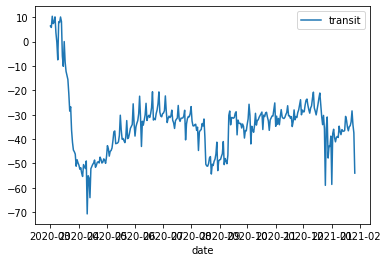

In [57]:
mob_aus_2_pd.plot("date", "transit")

<AxesSubplot:xlabel='date'>

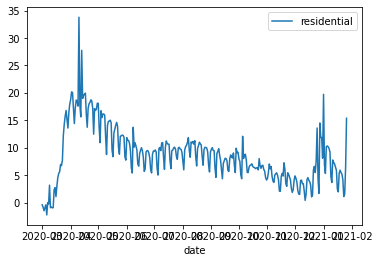

In [58]:
mob_aus_2_pd.plot("date", "residential")

<AxesSubplot:xlabel='date'>

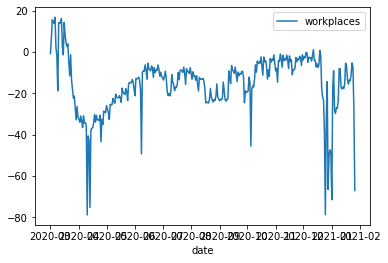

In [59]:
mob_aus_2_pd.plot("date", "workplaces")

<AxesSubplot:xlabel='date'>

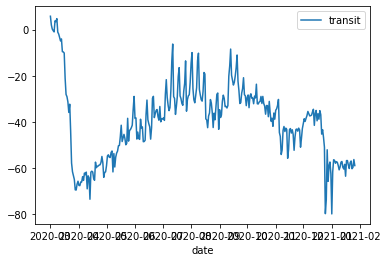

In [60]:
mob_uk_2_pd.plot("date", "transit")

<AxesSubplot:xlabel='date'>

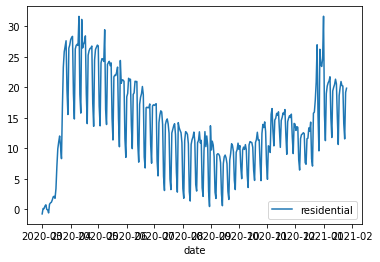

In [61]:
mob_uk_2_pd.plot("date", "residential")

<AxesSubplot:xlabel='date'>

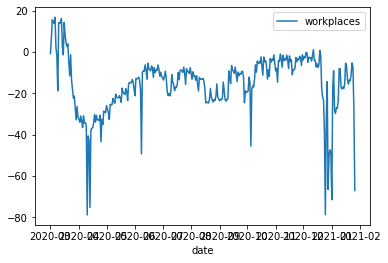

In [62]:
mob_aus_2_pd.plot("date", "workplaces")

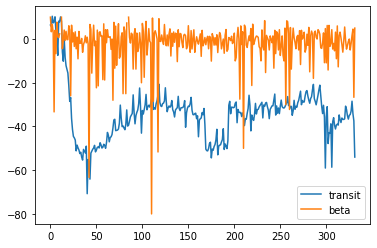

In [72]:
import matplotlib.pyplot as plt
plt.plot(mob_aus_2_pd["transit"], label="transit")
plt.plot(cases_aus_B_pd["beta"]*10,label="beta")
plt.legend()  

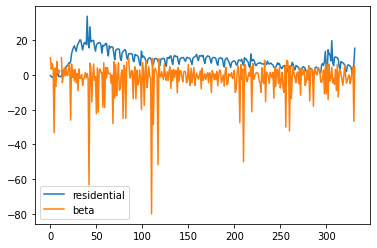

In [73]:
plt.plot(mob_aus_2_pd["residential"], label="residential")
plt.plot(cases_aus_B_pd["beta"]*10,label="beta")
plt.legend()    

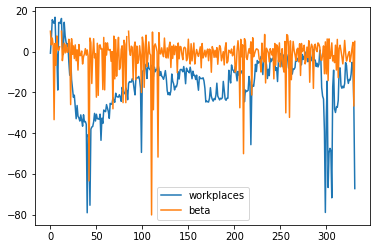

In [74]:
plt.plot(mob_aus_2_pd["workplaces"], label="workplaces")
plt.plot(cases_aus_B_pd["beta"]*10,label="beta")
plt.legend()  

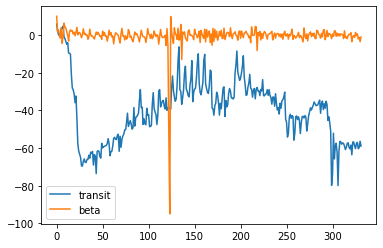

In [75]:
plt.plot(mob_uk_2_pd["transit"], label="transit")
plt.plot(cases_uk_B_pd["beta"]*10,label="beta")
plt.legend()  

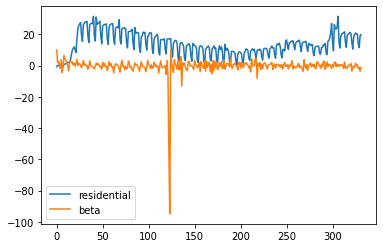

In [77]:
plt.plot(mob_uk_2_pd["residential"], label="residential")
plt.plot(cases_uk_B_pd["beta"]*10,label="beta")
plt.legend()  

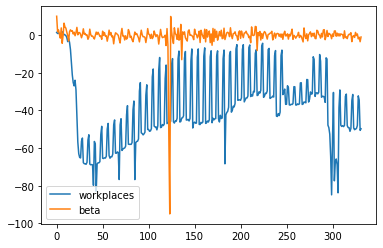

In [78]:
plt.plot(mob_uk_2_pd["workplaces"], label="workplaces")
plt.plot(cases_uk_B_pd["beta"]*10,label="beta")
plt.legend()  

In [105]:
cases_aus_B_pd['beta']=cases_aus_B_pd['beta'].fillna(0)

In [88]:
import numpy as np
c = np.corrcoef(cases_uk_B_pd['beta'],mob_uk_2_pd['transit'])
print('correlation of beta with', 'transit', ': ', c[0,1])
plt.figure()


correlation of beta with transit :  0.03731659218354762


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [89]:
c = np.corrcoef(cases_uk_B_pd['beta'],mob_uk_2_pd['residential'])
print('correlation of beta with', 'residential', ': ', c[0,1])
plt.figure()


correlation of beta with residential :  -0.04356530221964612


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [109]:
c = np.corrcoef(cases_uk_B_pd['beta'],mob_uk_2_pd['workplaces'])
print('correlation of beta with', 'workplaces', ': ', c[0,1])
plt.figure()


correlation of beta with workplaces :  0.04672321130499927


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [108]:
c = np.corrcoef(cases_aus_B_pd['beta'],mob_aus_2_pd['transit'])
print('correlation of beta with', 'transit', ': ', c[0,1])
plt.figure()

correlation of beta with transit :  0.06186622411637802


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [107]:
c = np.corrcoef(cases_aus_B_pd['beta'],mob_aus_2_pd['residential'])
print('correlation of beta with', 'residential', ': ', c[0,1])
plt.figure()

correlation of beta with residential :  -0.0409256046630248


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [106]:
c = np.corrcoef(cases_aus_B_pd['beta'],mob_aus_2_pd['workplaces'])
print('correlation of beta with', 'workplaces', ': ', c[0,1])
plt.figure()

correlation of beta with workplaces :  0.031958006758328834


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>